In [1]:
import numpy as np

from Clustering import PreProcessing, TimeSeriesPartitions, PostProcessing

from Utils import DataUtils, VisualUtils

In [2]:
n = 113
T_gdp = 118
T_pop = 118
T = 58
start_year = 1960

names_path = "Data/names.txt"
gdp_path = "Data/yp_raw.csv"
population_path = "Data/pop_raw.csv"
currency_path = "Data/currency.csv"
locations_path = "Data/locations.csv"
map_path = "Data/Map/ne_110m_admin_0_countries.shp"
groups_path = "Data/groups.txt"

In [3]:
names, gdp, pop, currency, map = DataUtils.load_clustering_data(
    names_path, gdp_path, population_path, currency_path, map_path, n, T_gdp, T_pop, T
)
locations = DataUtils.load_locations(n, locations_path)
groups = DataUtils.load_groups(groups_path)
gdp_data = np.log(gdp[:, -T:])
pop_data = pop[:, -T:]

In [4]:
df, scaled_df, scaled_data = PreProcessing.preprocess_onlyGDP(names, gdp_data, start_year, T)

In [5]:
k = 4
n_init = 100

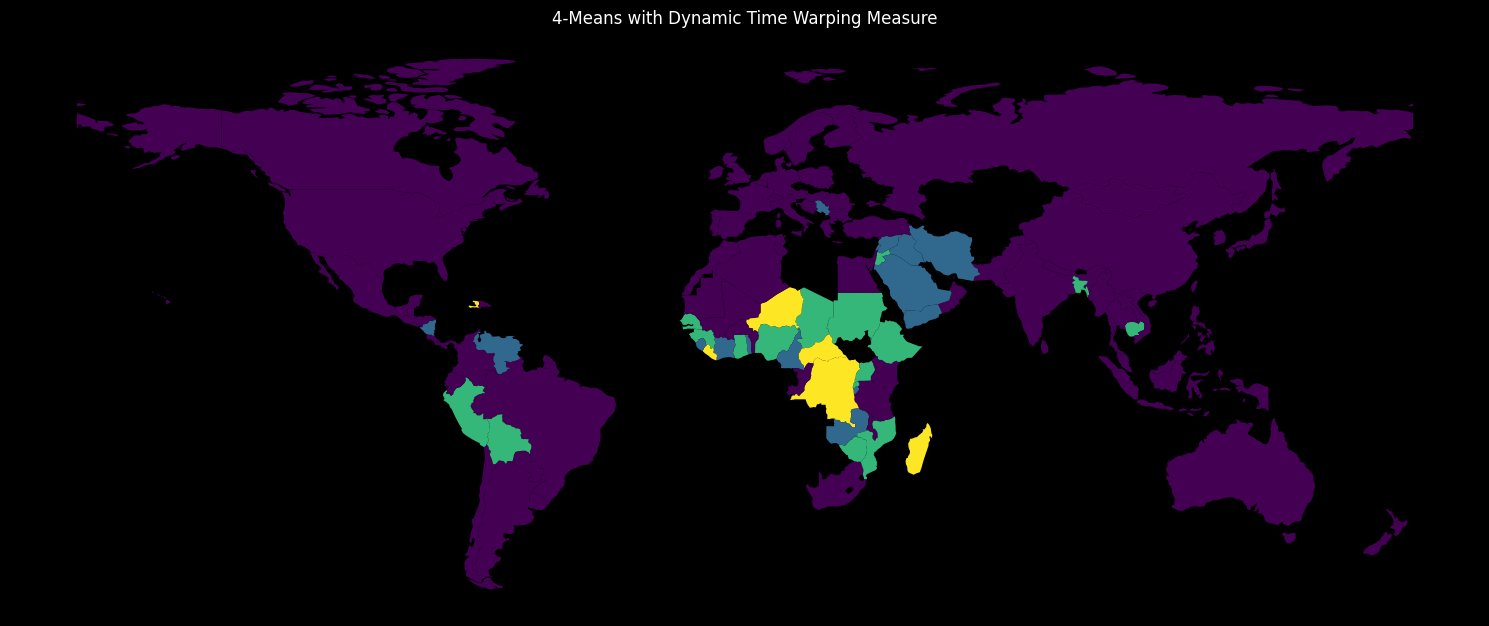

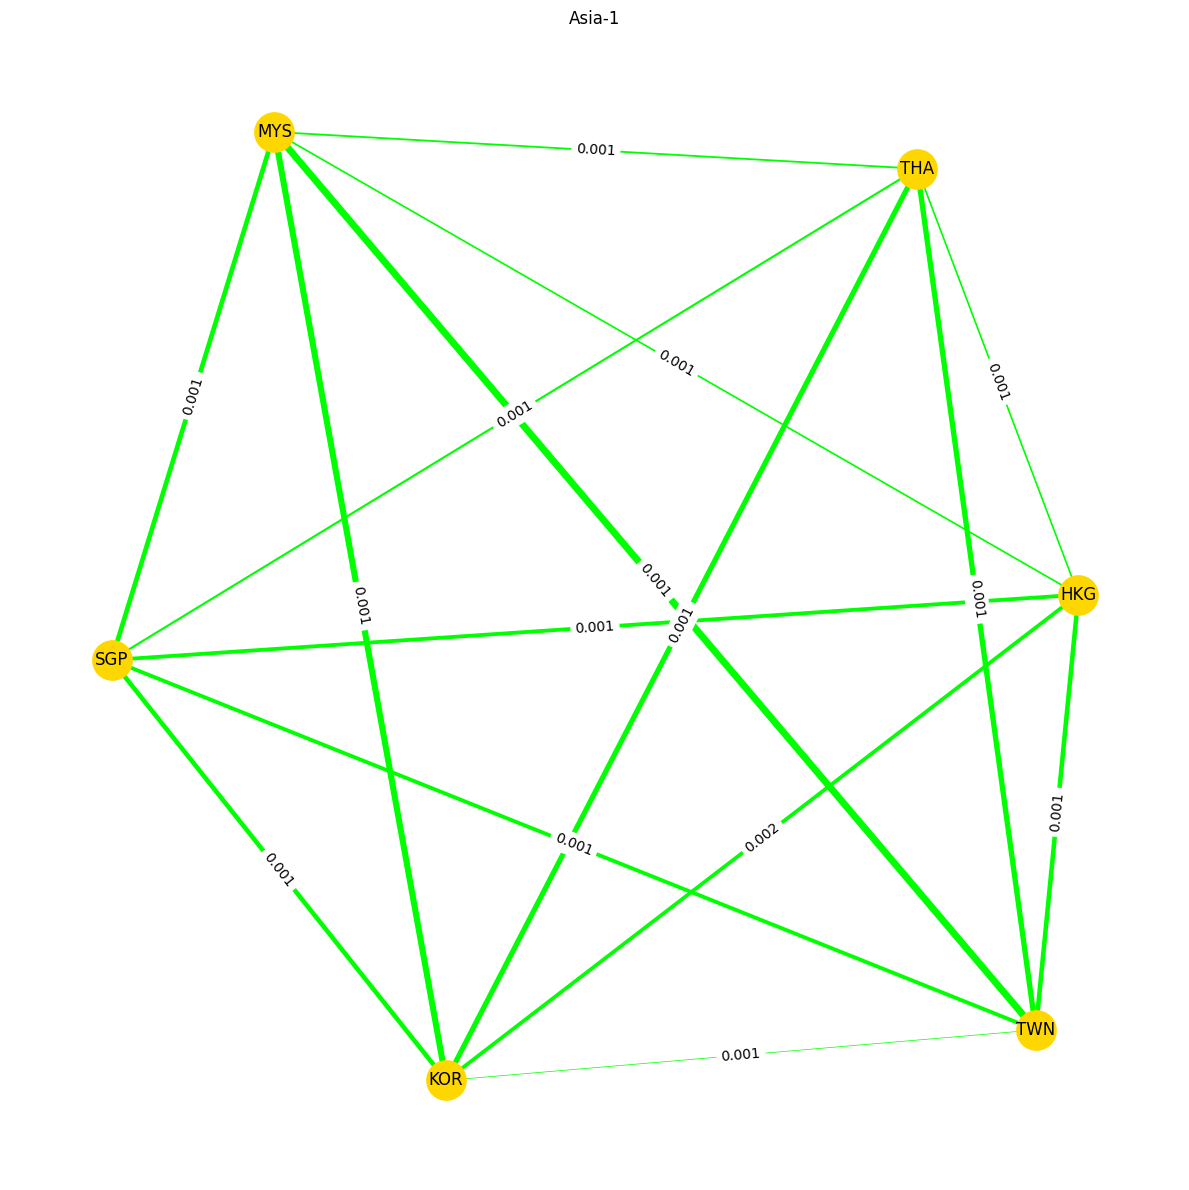

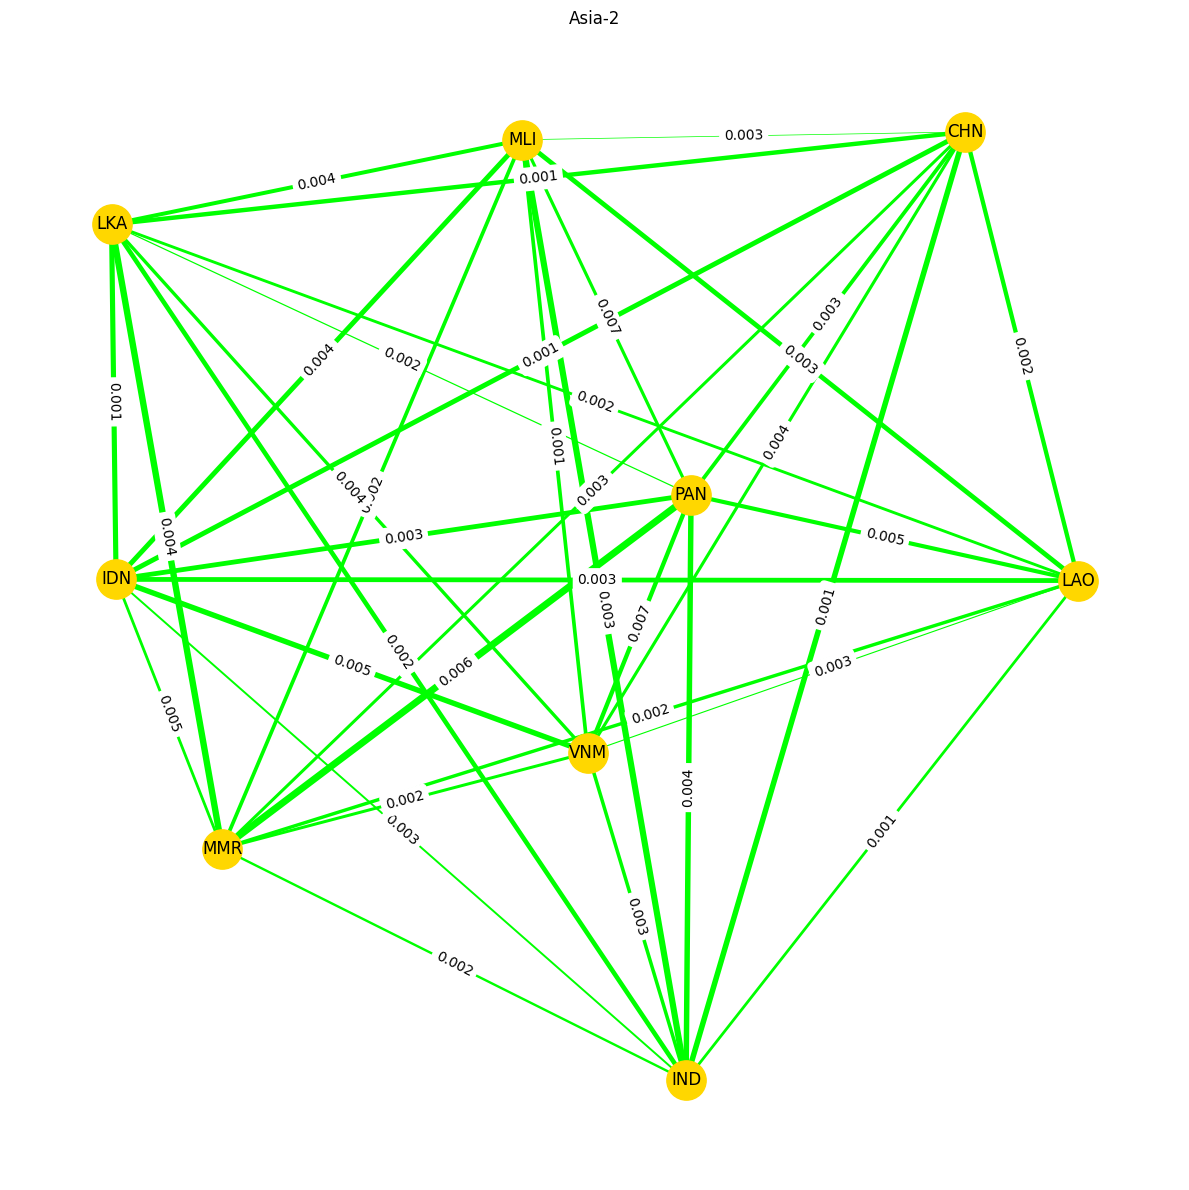

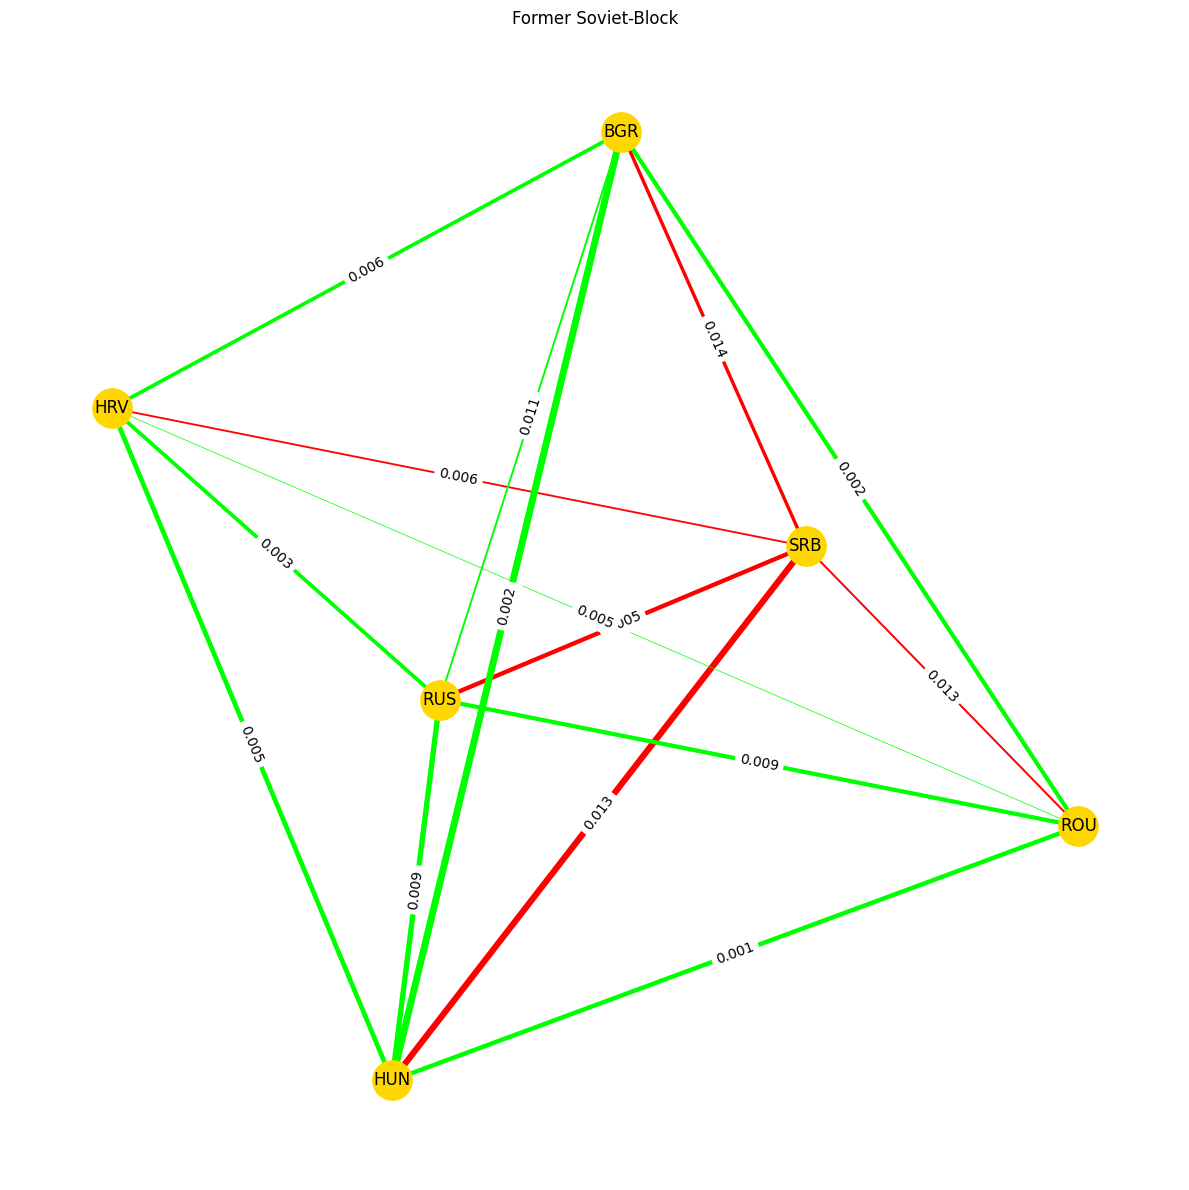

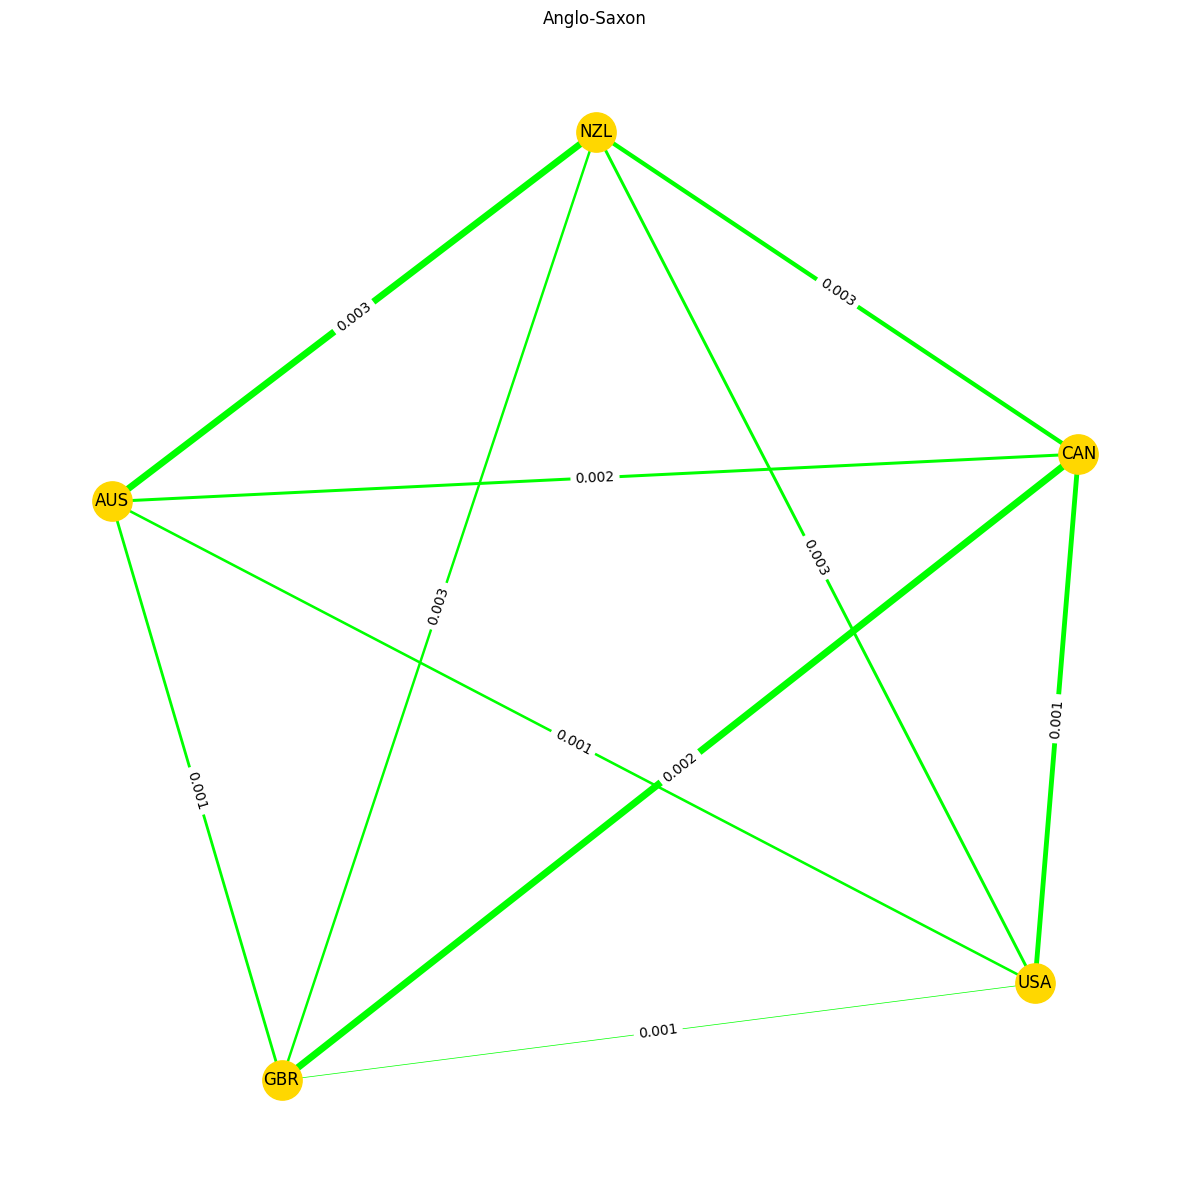

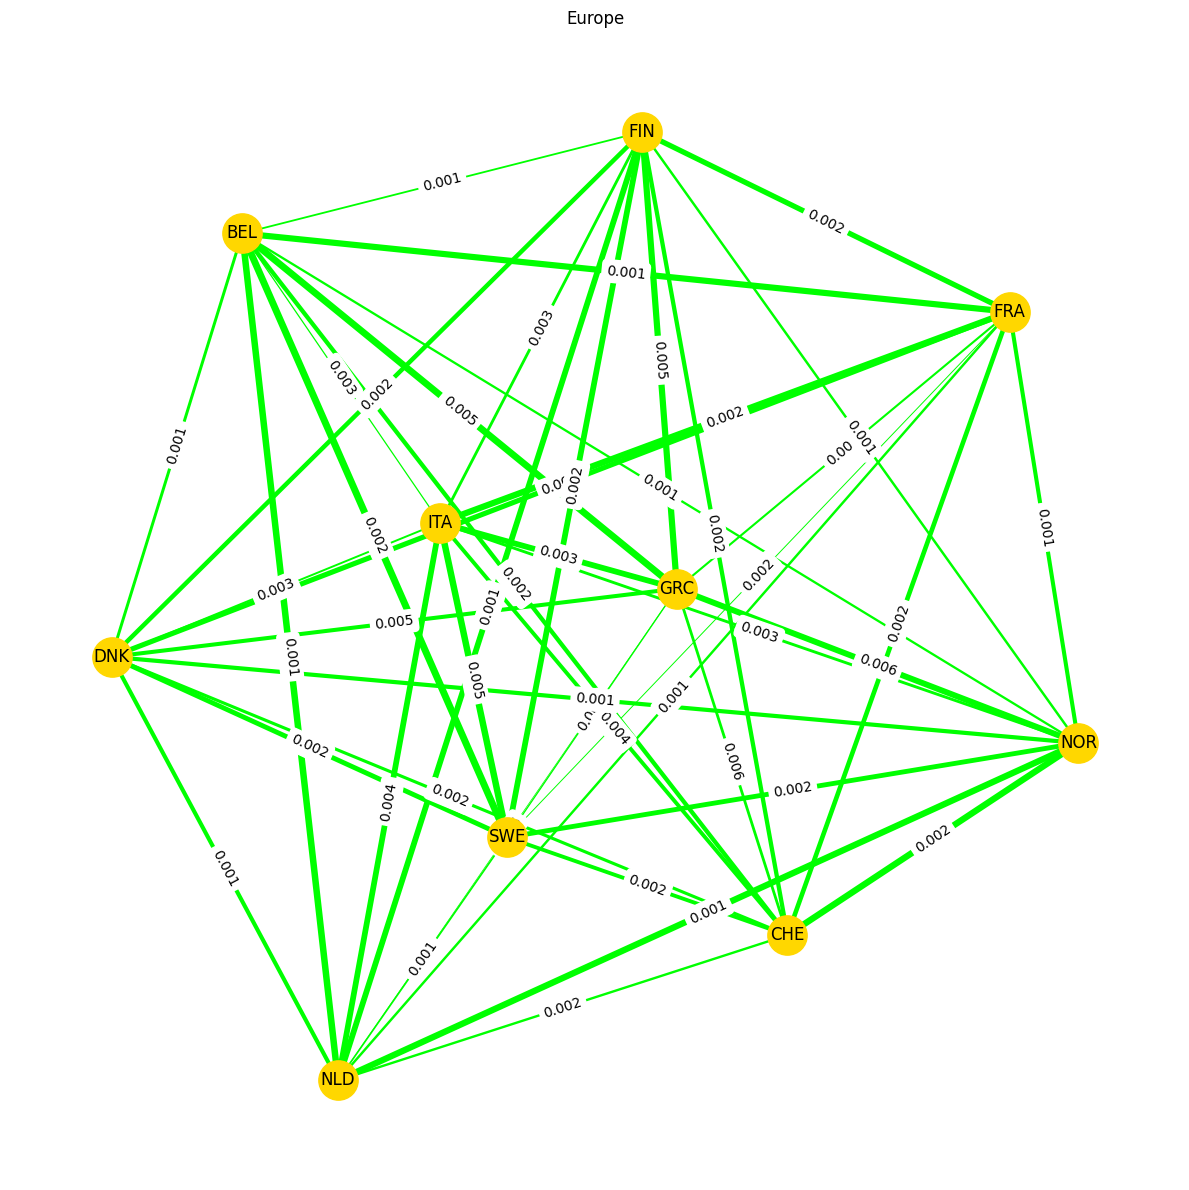

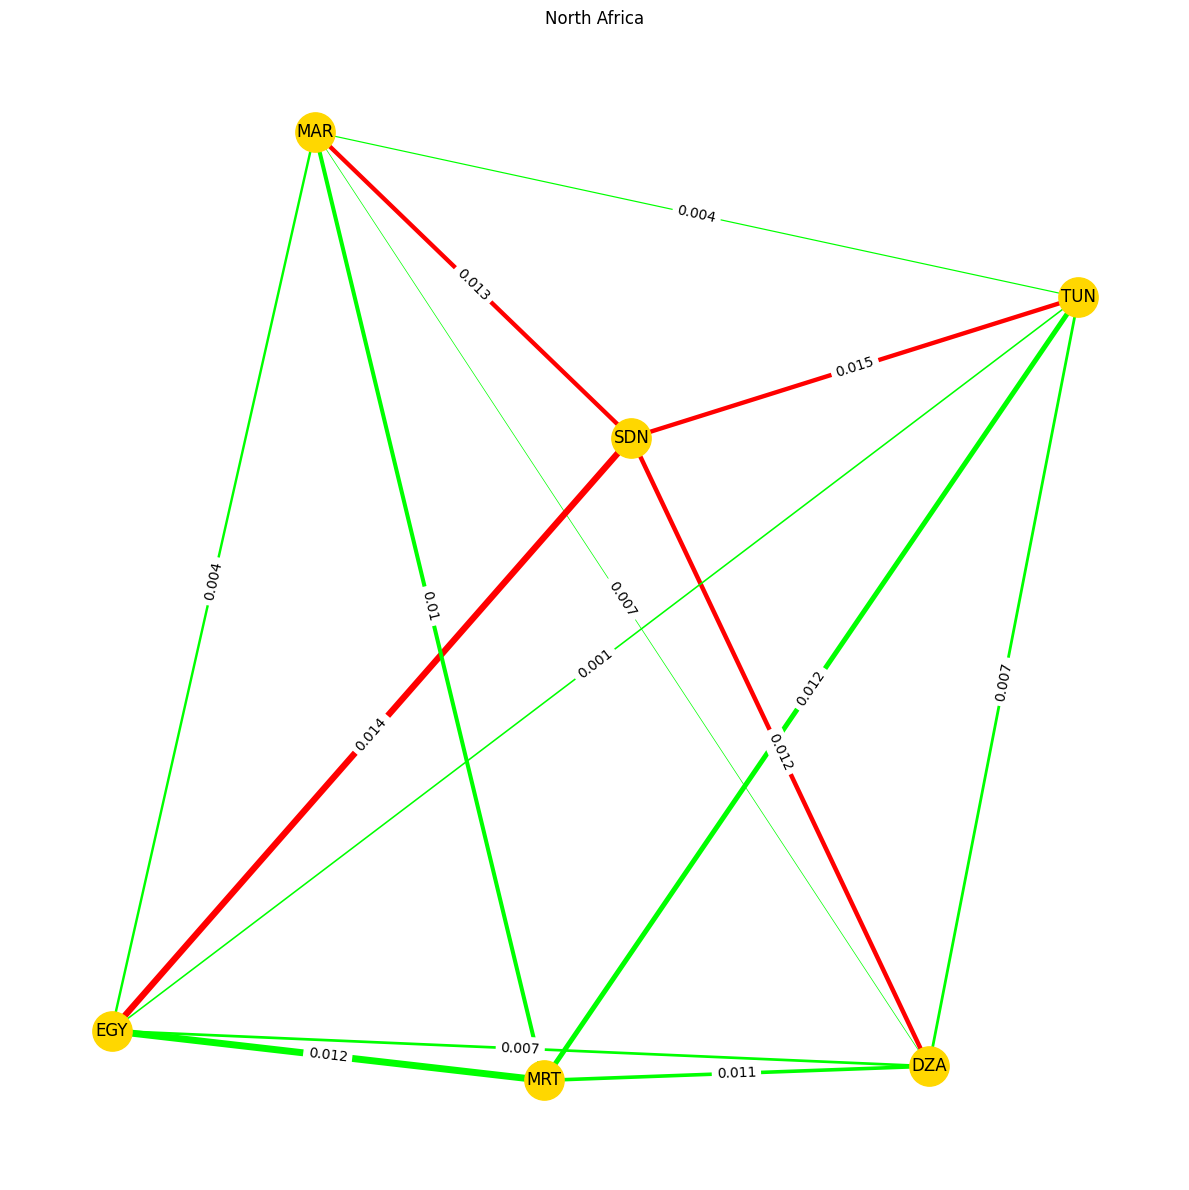

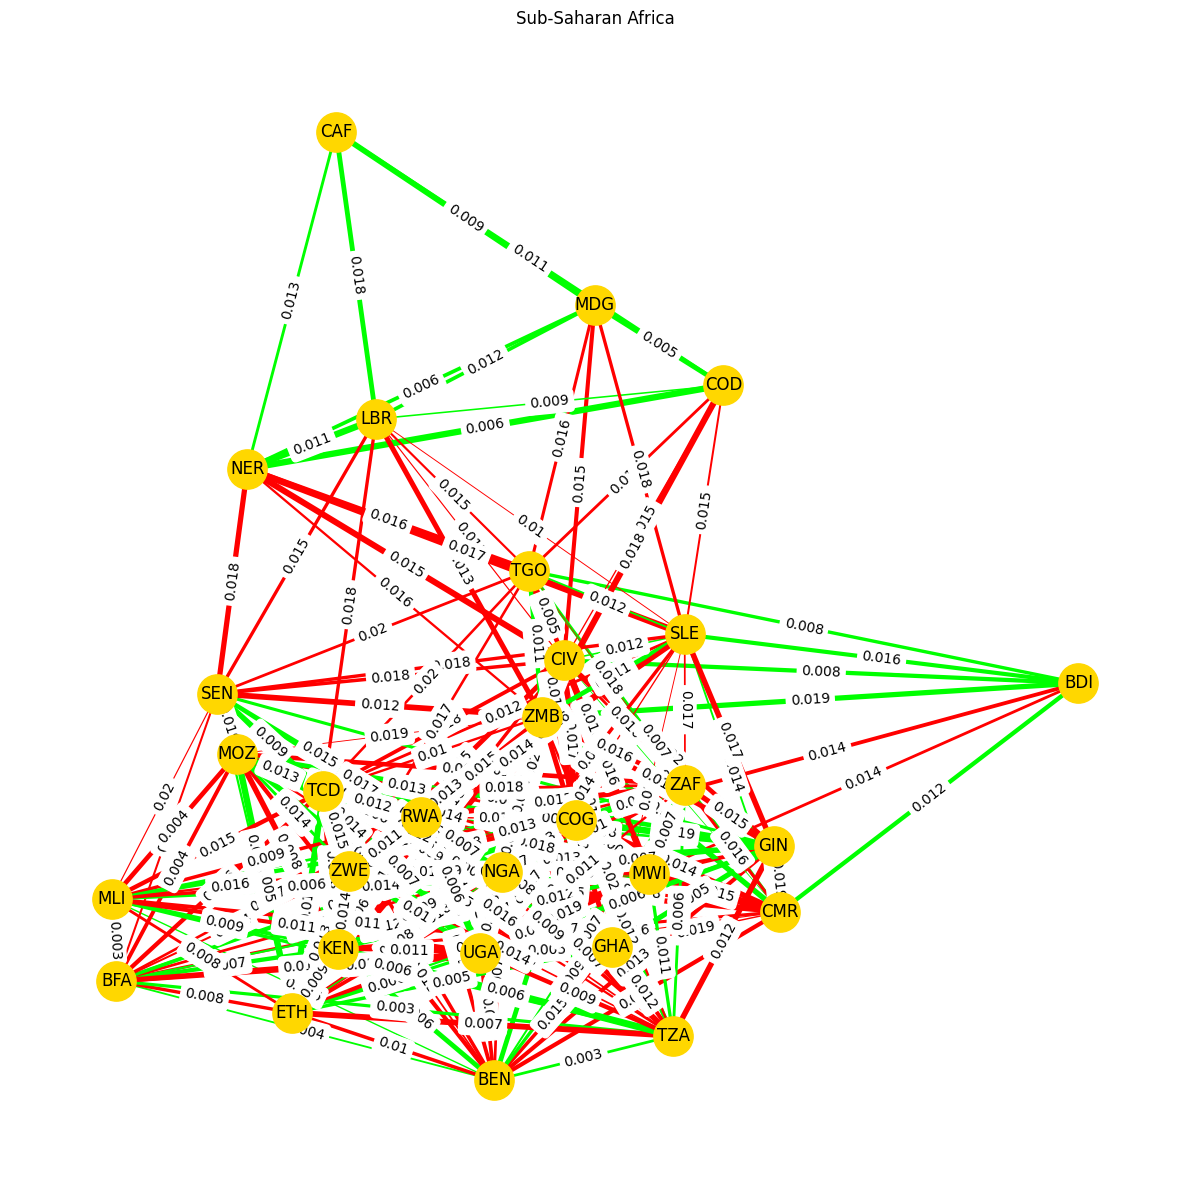

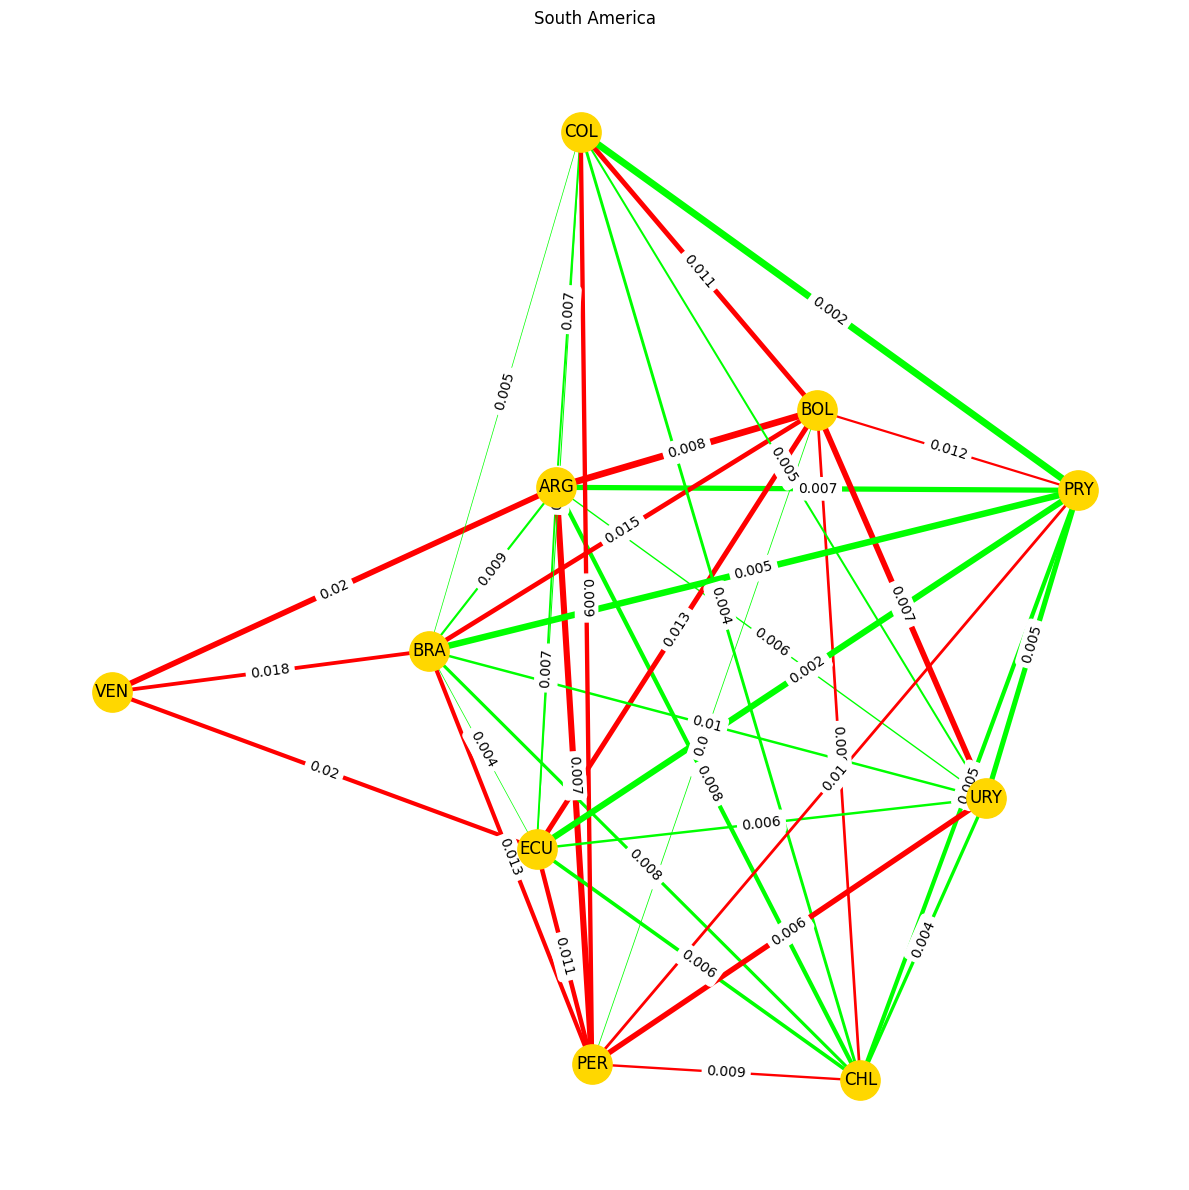

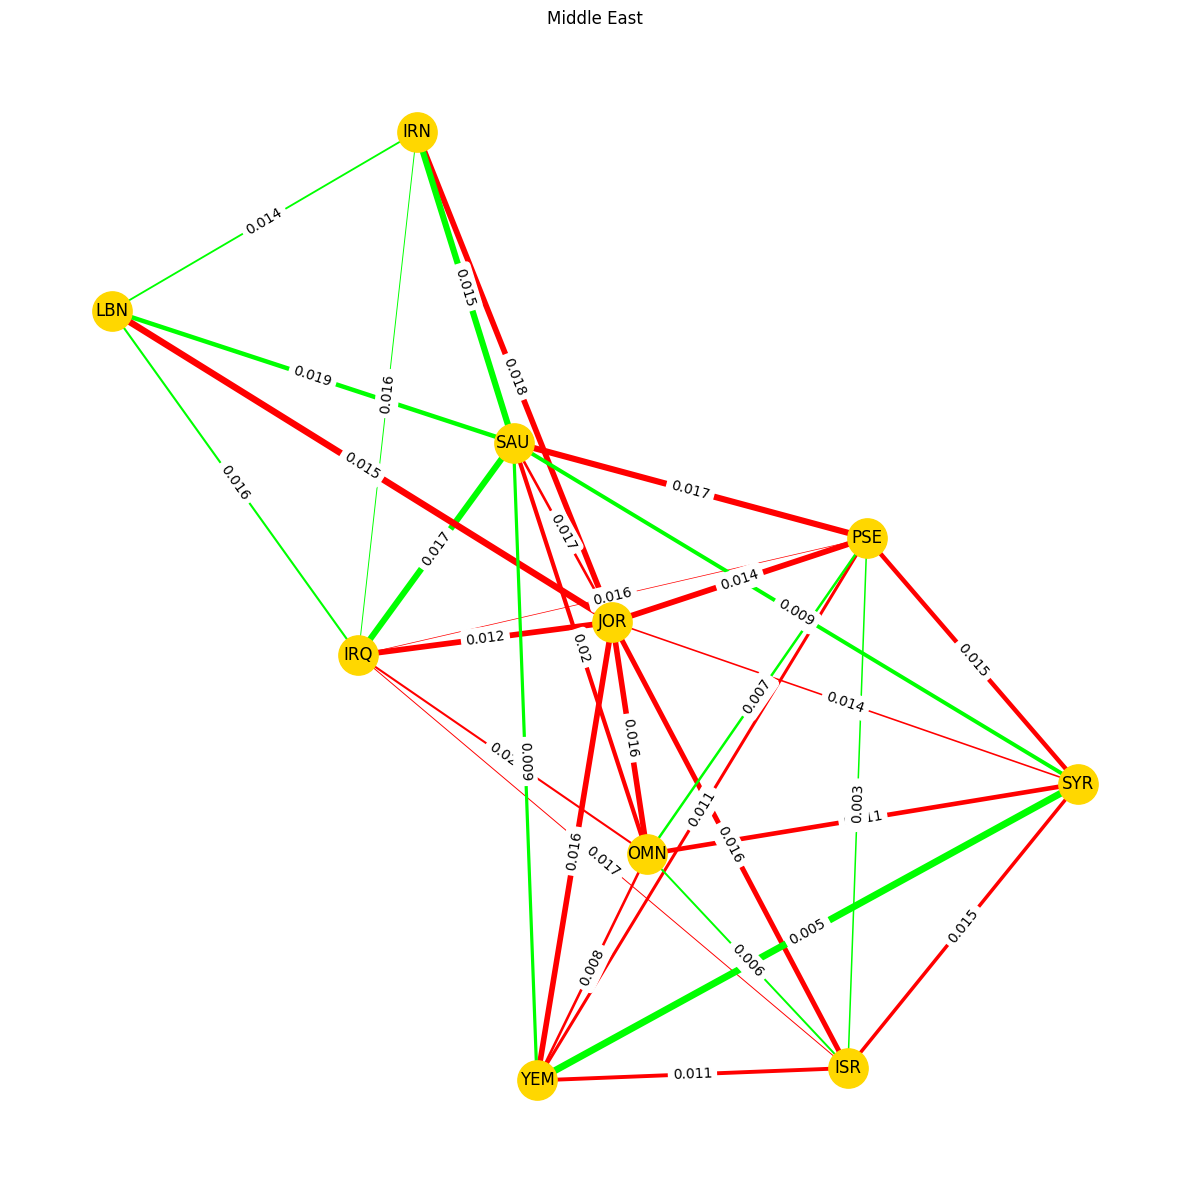

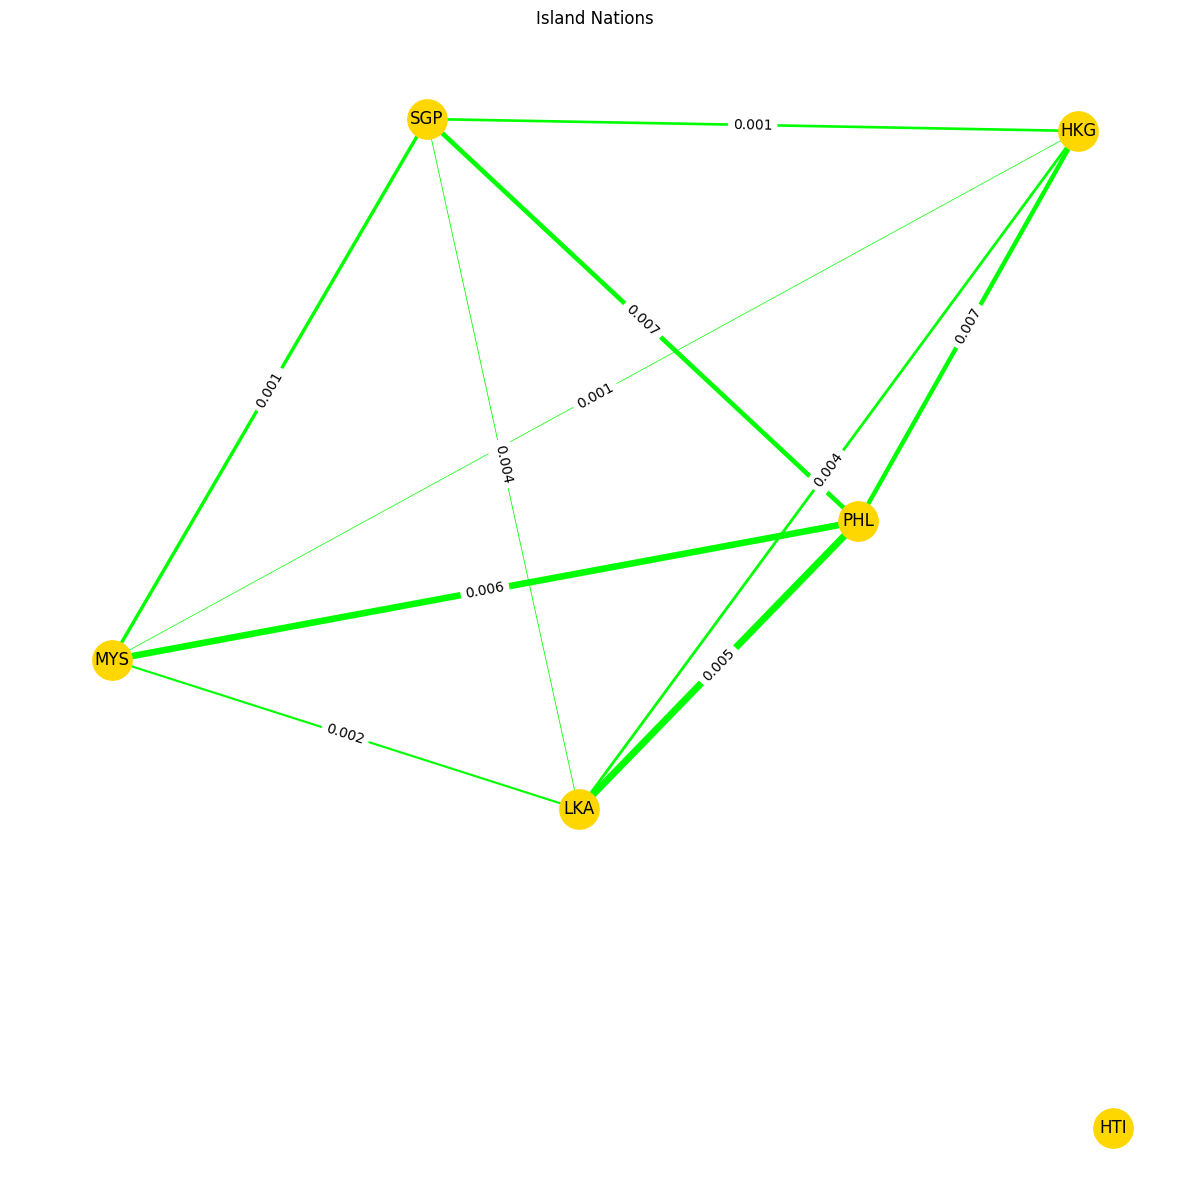

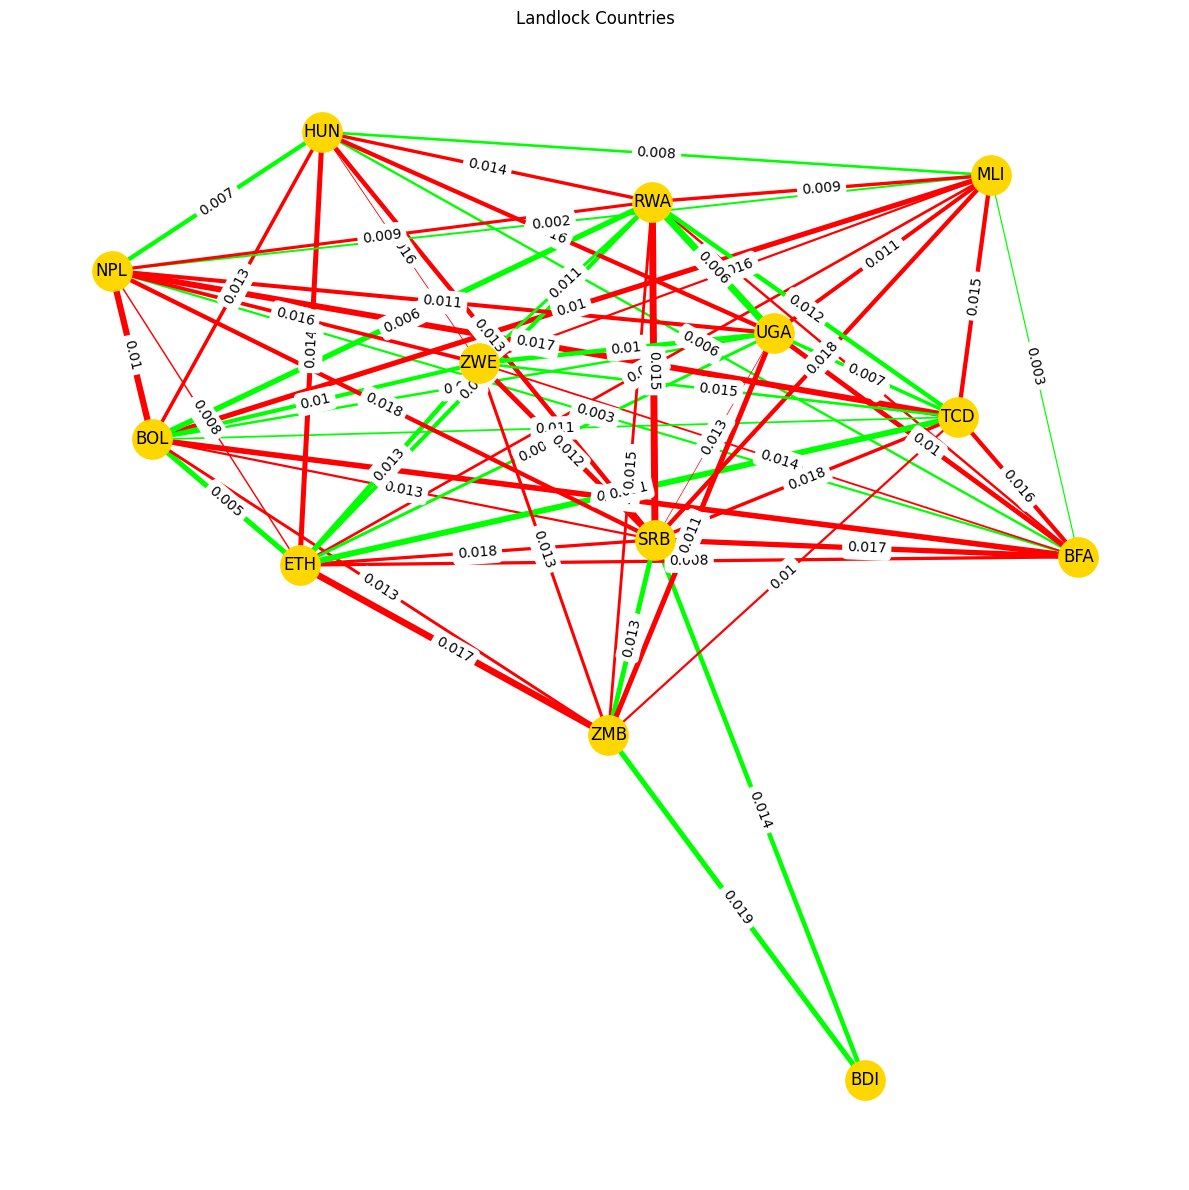

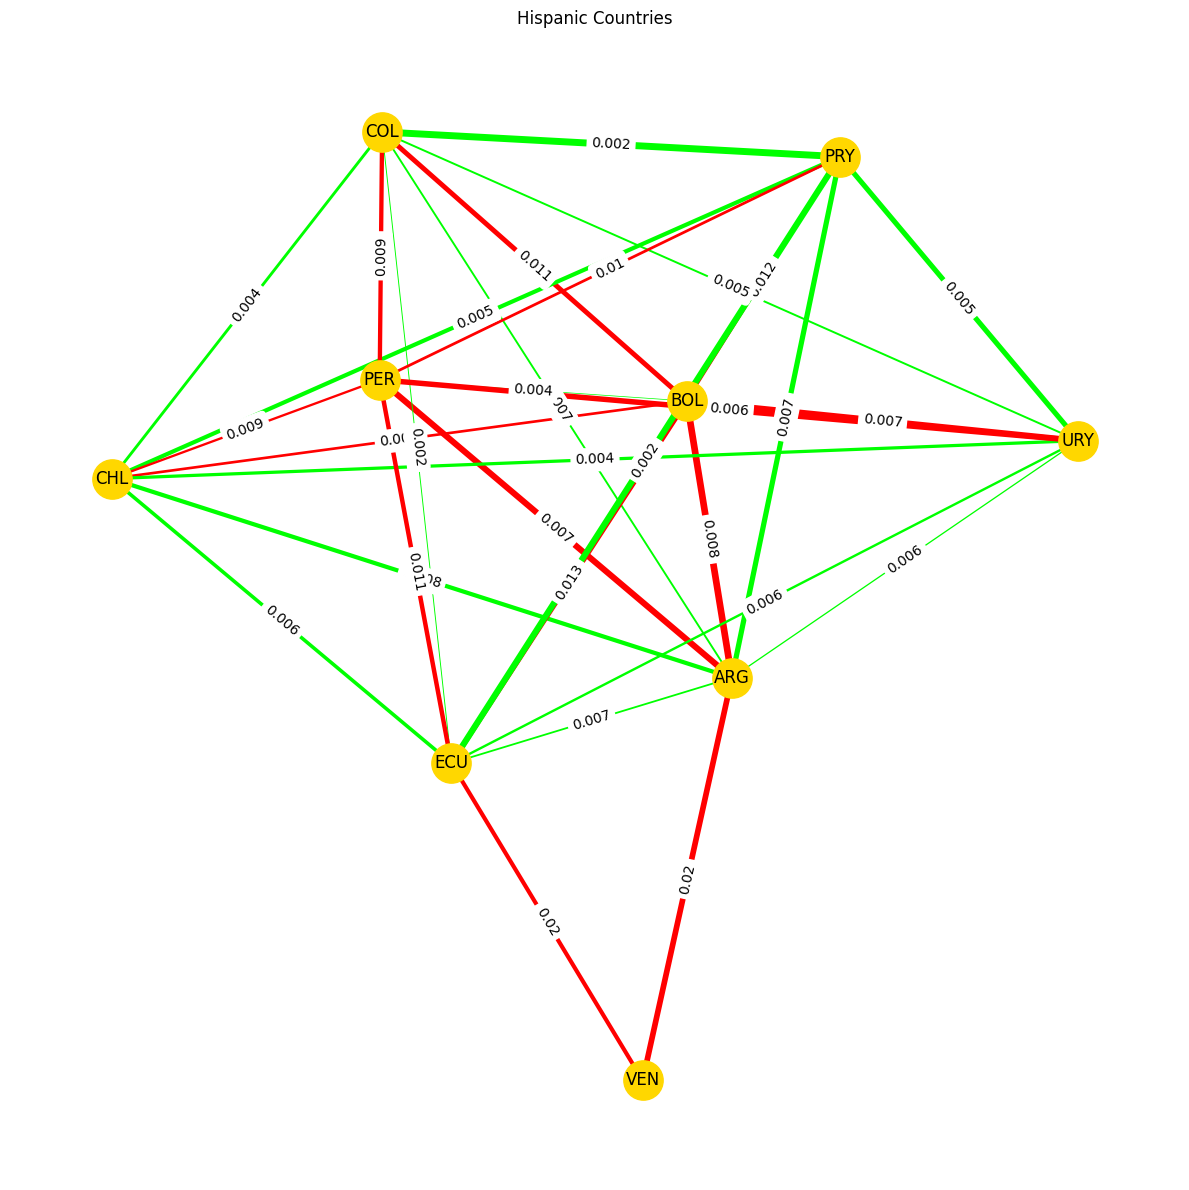

In [6]:
y_km, centroids_km = TimeSeriesPartitions.kmeans_dtw(scaled_df, k, n_init)
VisualUtils.show_clusters_on_map(names, y_km, map, '4-Means with Dynamic Time Warping Measure')
PostProcessing.postprocess_clustering(scaled_data, locations, names, groups, y_km)

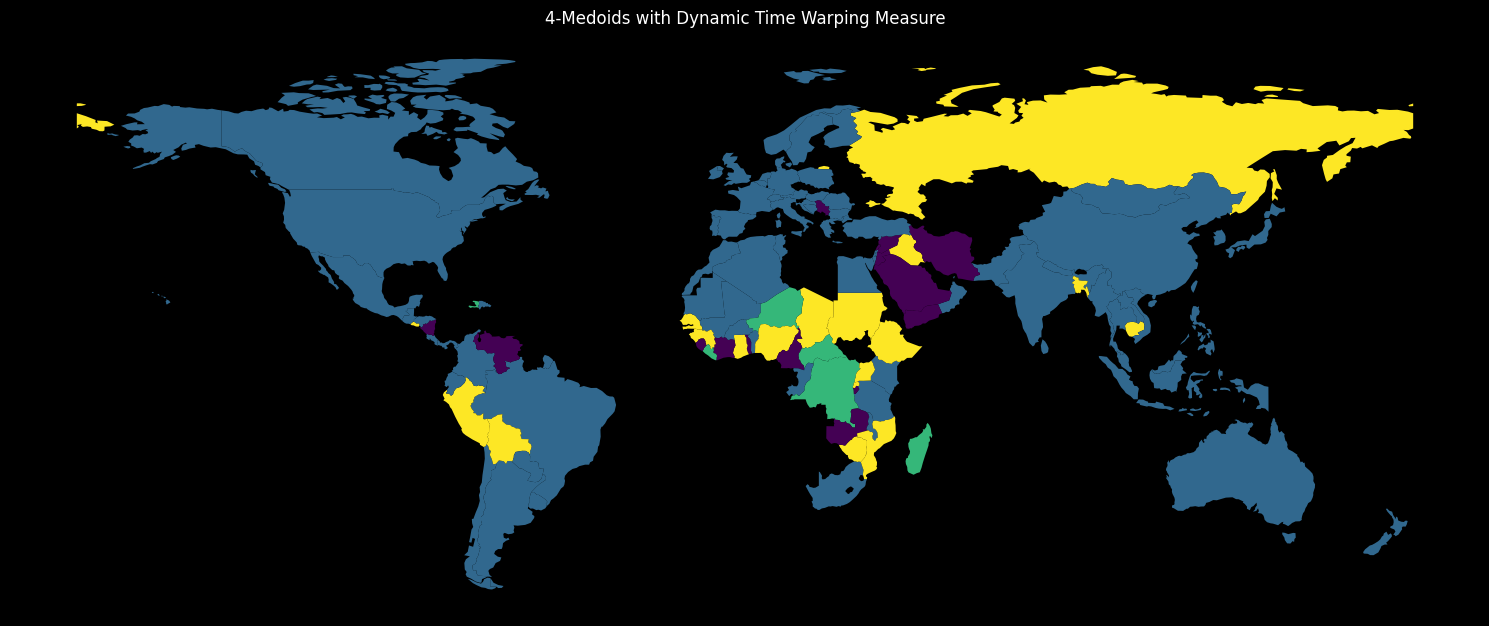

In [7]:
y_kmed, centroids_kmed = TimeSeriesPartitions.kmedoids_dtw(scaled_df, k, n_init)
VisualUtils.show_clusters_on_map(names, y_kmed, map, '4-Medoids with Dynamic Time Warping Measure')